In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("RAW_QualtricsExport.xlsx", header=1)

c:\Users\user\Desktop\DBProj\edmmmmm\RemoteEducationAnalysis\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
# drop unnecessary columns
df = df.drop(
    df.columns[
        [
            0,  # Start Date
            1,  # End Date
            2,  # Response Type
            3,  # IPAddress
            4,  # Progress
            5,  # Duration (in seconds)
            6,  # Finished
            7,  # RecordedDate
            8,  # ResponseId
            9,  # RecipientLastName
            10,  # RecipientFirstName
            11,  # RecipientEmail
            12,  # ExternalReference
            13,  # LocationLatitude
            14,  # LocationLongitude
            15,  # DistributionChannel
            16,  # UserLanguage
            17,  # agreements
            18,  # agreements
            19,  # agreements
            20,  # agreements
            21,  # agreements
            22,  # agreements
            23,  # agreements
            24,  # agreements
            25,  # info about the survey
            26,  # Prolific ID
            29,  # other
            32,  # other
            34,  # other
            36,  # other
            40,  # info about the survey
            45,  # attention check
            71,  # attention check
            75,  # feedback
        ]
    ],
    axis=1,
)

# the last 9 rows are not completed
df = df.drop(df.tail(9).index)

In [4]:
# replace column names
questions_dict = {}
for id, name in enumerate(df.columns):
    df.rename(columns={name: "Q" + str(id+1)}, inplace=True)
    name = name.strip().replace(' - Selected Choice', '').replace('\r', ' ').replace('\n', '')
    questions_dict["Q" + str(id+1)] = name
    print(f'Q{id+1}: {name}')

Q1: In the last semester I attended my education:
Q2: What is your gender?
Q3: List of Countries
Q4: In which country are you performing your education?
Q5: In which domain is the class you spent more time on (e.g., lecture hours, homework, exercises, course project, individual study time)?Time spent is an individual assessment, do not refer on the indication of your Syllabus but on the actual time YOU spent on the subject. Remember to think to this class when answering the the survey.
Q6: Level of education. I am attending a:
Q7: I had always a good and reliable internet connection for my online education.
Q8: For the course, we also worked in teams.
Q9: If I could choose, I would conclude my entire education with online/remote teaching.
Q10: I would recommend this instructor to other students.
Q11: I would recommend this class to other students.
Q12: I would take a class at this university again in the future.
Q13: I was very satisfied with this online class.
Q14: The academic qualit

In [5]:
# calcute number of nan of each column
print(df.isnull().sum().values)
# drop rows containing nan (since it's not a lot)
df = df.dropna()

[0 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2]


In [6]:
# mapping categorical values to numerical values
# df_mapped: convert everything to numerical values (to make corelation matrix)
# df: convert answer contain "agree" to numerical values
df_mapped = df.copy()
common_value_map_1 = {"Disagree": 0.0, "Agree": 1}
common_value_map_2 = {
    "Strongly disagree": 0,
    "Disagree": 1,
    "Somewhat disagree": 2,
    "Neither agree nor disagree": 3,
    "Somewhat agree": 4,
    "Agree": 5,
    "Strongly agree": 6,
}
value_maps = {}
for id, name in enumerate(df.columns):
    if id in [6, 7, 8]:
        value_maps[name] = common_value_map_1
    elif id >= 9:
        value_maps[name] = common_value_map_2
        df[name] = df[name].map(value_maps[name])
    else:
        value_maps[name] = {}
        for i, value in enumerate(df[name].unique()):
            value_maps[name][value] = i
    df_mapped[name] = df_mapped[name].map(value_maps[name])

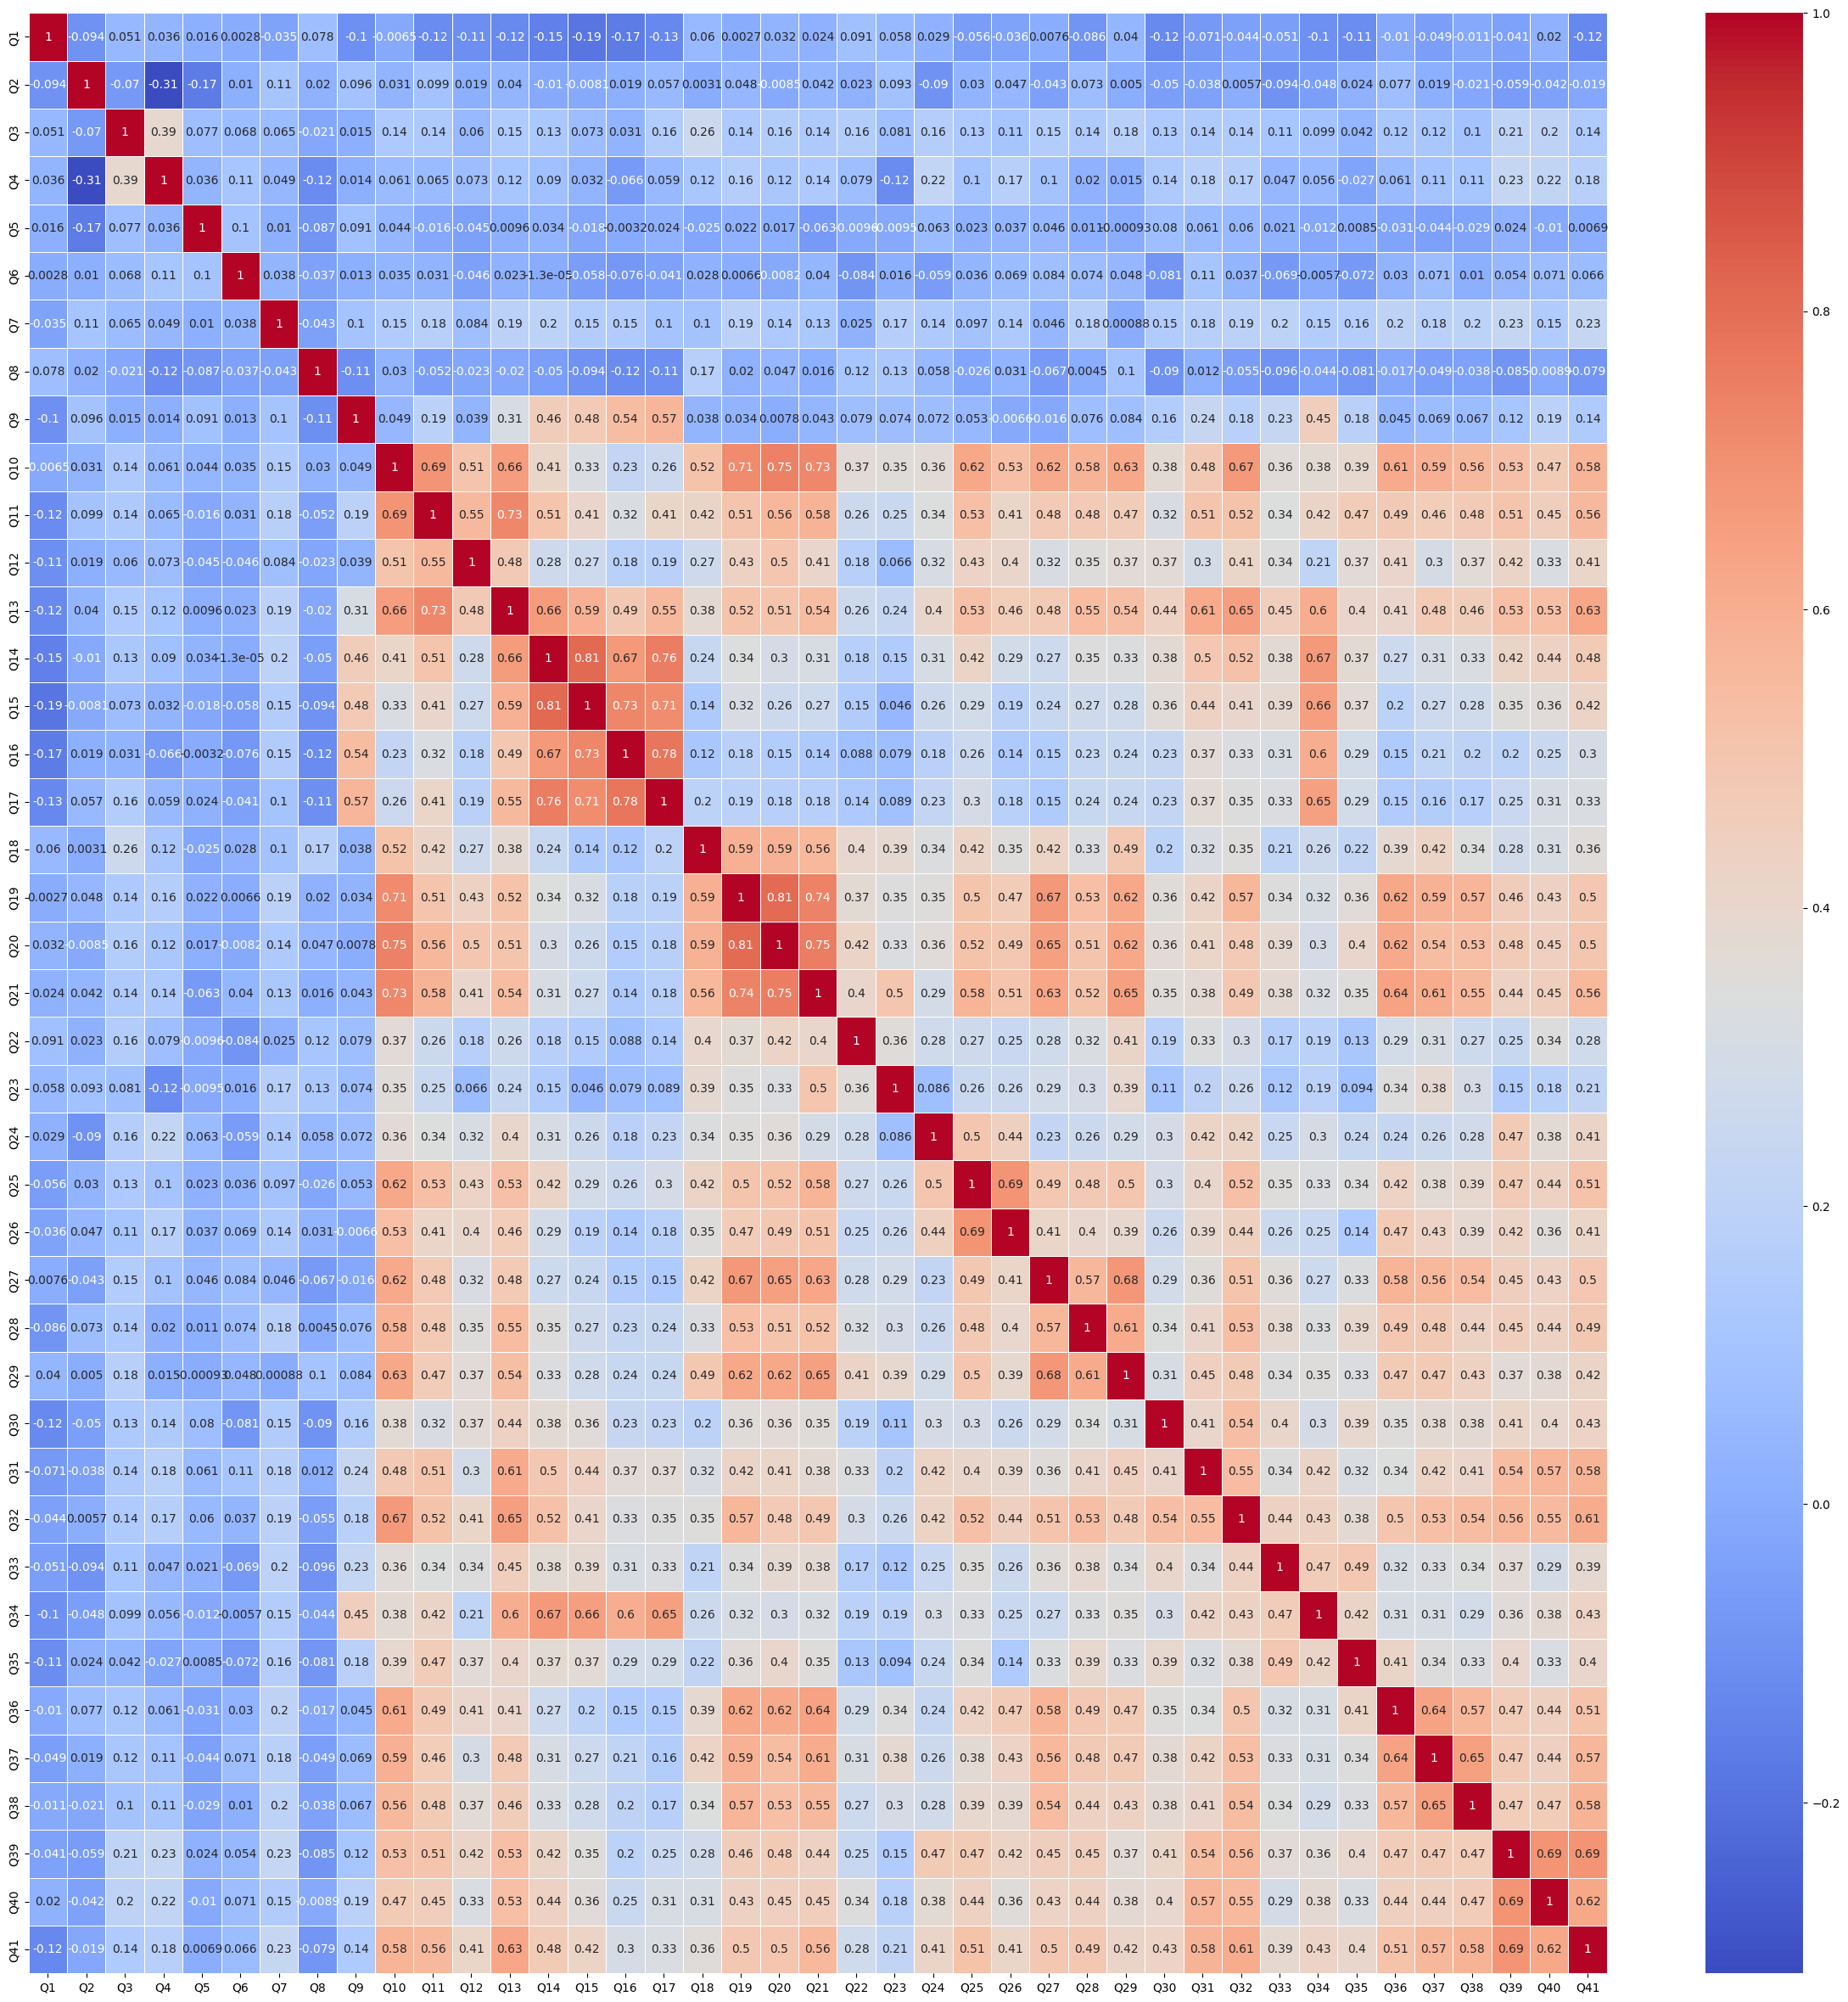

In [7]:
# correlation heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(df_mapped.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()

Q1: In the last semester I attended my education:
Always at home or remotely                        236
Sometimes at home, sometimes at the university     54
Only at my university campus                       10
Name: count, dtype: int64

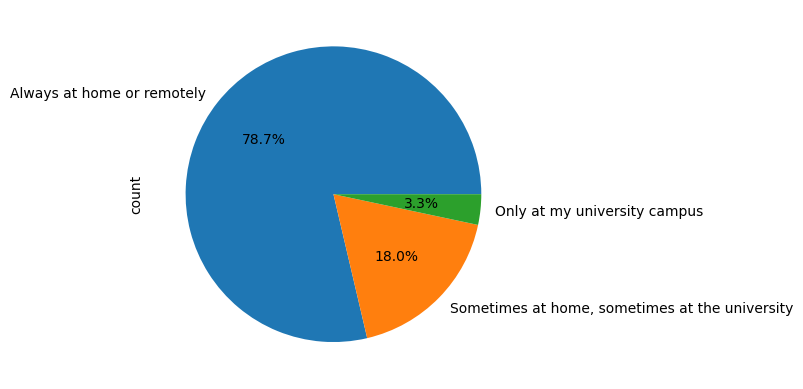

In [8]:
# pie chart
df['Q1'].value_counts().plot(kind="pie", autopct="%1.1f%%")
df['Q1'].rename('Q1: ' + questions_dict['Q1']).value_counts()

Q2: What is your gender?
Man           175
Woman         123
Non-binary      2
Name: count, dtype: int64

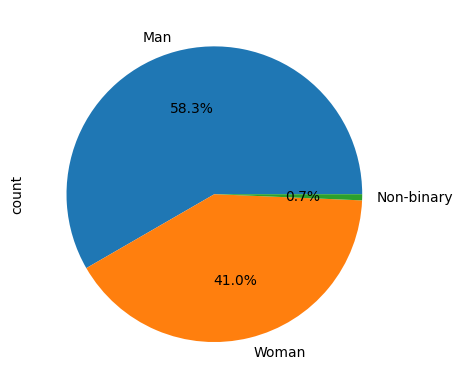

In [9]:
# pie chart
df['Q2'].value_counts().plot(kind="pie", autopct="%1.1f%%")
df['Q2'].rename('Q2: ' + questions_dict['Q2']).value_counts()

Q5: In which domain is the class you spent more time on (e.g., lecture hours, homework, exercises, course project, individual study time)?Time spent is an individual assessment, do not refer on the indication of your Syllabus but on the actual time YOU spent on the subject. Remember to think to this class when answering the the survey.
Programming Languages                        70
Alghoritms and Data Structures               42
Software Engineering and Design              40
Mathematics                                  37
Security                                     23
Machine Learning                             17
Human-Computer Interaction and Interfaces    17
Computer Architecture and Compilers          15
Other                                        15
Database                                     14
Operating Systems                             9
Parallel and Distributed Systems              1
Name: count, dtype: int64

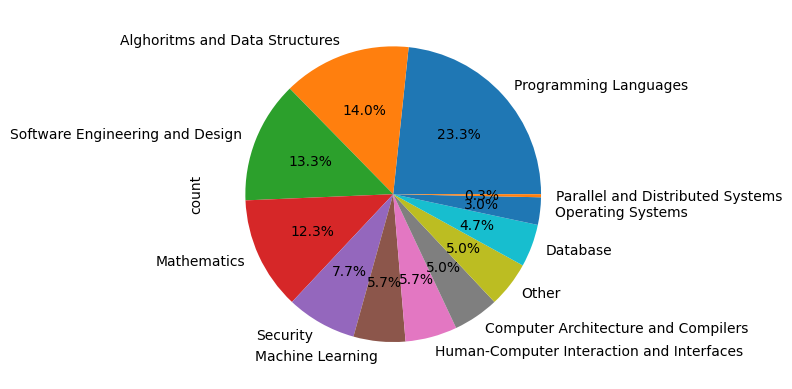

In [10]:
# pie chart
df['Q5'].value_counts().plot(kind="pie", autopct="%1.1f%%")
df['Q5'].rename('Q5: ' + questions_dict['Q5']).value_counts()

Q6: Level of education. I am attending a:
Bachelor degree    240
Masters degree      39
Other               16
PhD degree           5
Name: count, dtype: int64

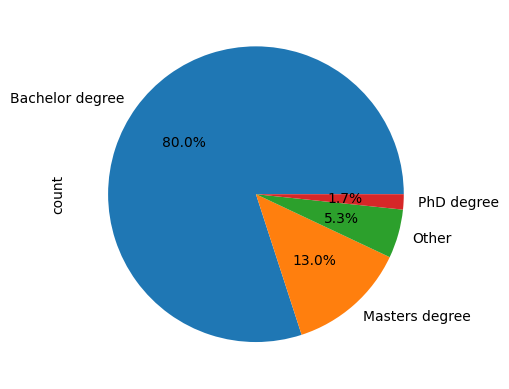

In [11]:
# pie chart
df['Q6'].value_counts().plot(kind="pie", autopct="%1.1f%%")
df['Q6'].rename('Q6: ' + questions_dict['Q6']).value_counts()

<Axes: >

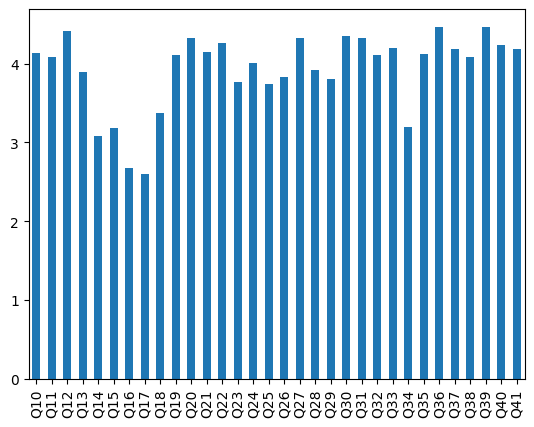

In [12]:
# mean of questions
df[df.columns[9:]].mean().plot(kind="bar")

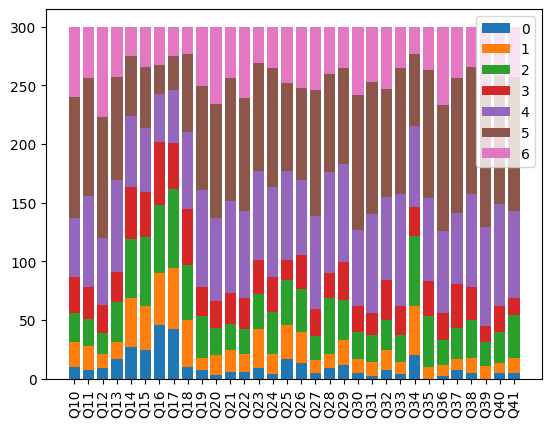

In [13]:
arr = np.zeros(shape = (7, df.columns[9:].shape[0]))
# print(arr.shape)
for i, name in enumerate(df.columns[9:]):
    temp = df[name].value_counts()
    for ii in temp.index:
        arr[ii][i] = temp[ii]
    
fig, ax = plt.subplots()
bottom = np.zeros(arr.shape[1])
x = np.arange(arr.shape[1])
for i in range(arr.shape[0]):
    ax.bar(x, arr[i], bottom=bottom, label=i)
    bottom += arr[i]

ax.legend()
plt.xticks(range(arr.shape[1]), [f'Q{i}' for i in range(10,42)], rotation=90)
plt.show()


<Axes: >

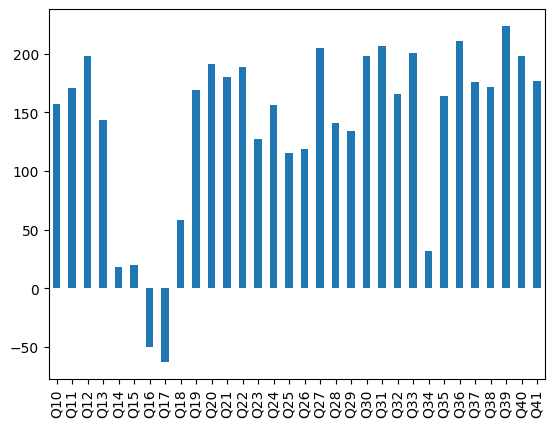

In [14]:
# mapping numerical values into only -1, 0, 1
df_mapped_tri = pd.DataFrame()

for id, name in enumerate(df.columns[9::]):    
    df_mapped_tri[name] = df[name].map(lambda x: [-1, -1, -1, 0, 1, 1, 1][x])

df_mapped_tri.sum().plot(kind="bar")


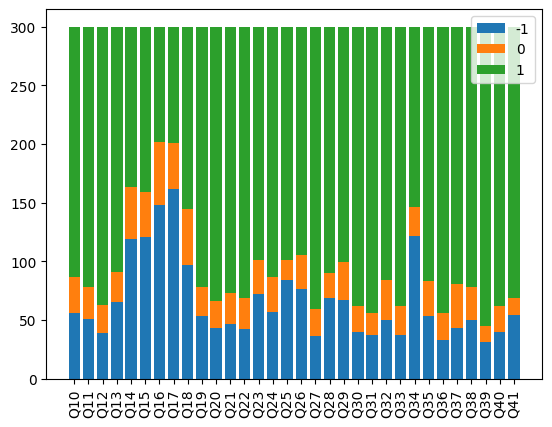

In [15]:
arr = np.zeros(shape = (3, df_mapped_tri.shape[1]))
# print(df_mapped_tri)
for i, name in enumerate(df_mapped_tri):
    temp = df_mapped_tri[name].value_counts()
    for ii in temp.index:
        arr[ii+1][i] = temp[ii]

fig, ax = plt.subplots()
bottom = np.zeros(arr.shape[1])
x = np.arange(arr.shape[1])
for i in range(arr.shape[0]):
    ax.bar(x, arr[i], bottom=bottom, label=i-1)
    bottom += arr[i]

ax.legend()
plt.xticks(range(arr.shape[1]), [f'Q{i}' for i in range(10,42)], rotation=90)
plt.show()

In [16]:
cat_question_lst = [
    ["Q10", "Q11", "Q12"],
    ["Q13"],
    ["Q14", "Q15", "Q16", "Q17"],
    ["Q18", "Q19", "Q20", "Q21", "Q23", "Q24", "Q25", "Q26", "Q27", "Q28", "Q29", "Q32", "Q36", "Q37", "Q38", "Q41"],
    ["Q22", "Q30", "Q33", "Q34", "Q35"],
    ["Q31", "Q39", "Q40"],
]
cat_name_lst = [
    "Recommend",
    "General",
    "Comparison",
    "Instructor",
    "Tools",
    "Clarity",
]
def catgorize(question = None, all = False):
    df_cat = pd.DataFrame()

    if (all):
        question = lambda x: True
        df_cat = pd.DataFrame({"count": df_mapped.shape[0]}, index=['all'])
    else:
        df_cat = pd.DataFrame(df_mapped[question].value_counts())
        
    temp = df_mapped.groupby(by = question).sum()
    for i, question_lst in enumerate(cat_question_lst):
        df_cat[cat_name_lst[i]] = temp[cat_question_lst[i]].sort_index().sum(axis=1).values / df_cat["count"].sort_index() / len(cat_question_lst[i])
    df_cat['Total Score'] = df_cat.iloc[:,1:].mean(axis=1)
    
    if (all):
        return df_cat

    # reverse map
    new_value_map = {}
    for k, v in value_maps[question].items():
        new_value_map[v] = k
    df_cat = df_cat.rename(index=lambda x: new_value_map[x])
    return df_cat

catgorize(all = True)

,count,Recommend,General,Comparison,Instructor,Tools,Clarity,Total Score
all,300,4.208889,3.9,2.884167,4.023125,4.028667,4.346667,3.898586


<Axes: >

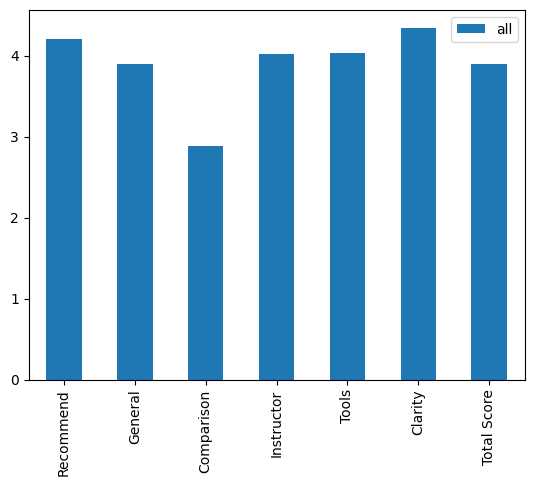

In [17]:
# bar chart
catgorize(all = True).iloc[:,1:].transpose().plot(kind="bar")

In [18]:
print(questions_dict['Q2'])
catgorize("Q2")

What is your gender?


,count,Recommend,General,Comparison,Instructor,Tools,Clarity,Total Score
Q2,,,,,,,,
Man,175,4.264762,3.988571,2.915714,4.052143,4.006857,4.306667,3.922452
Woman,123,4.121951,3.796748,2.845528,3.986280,4.069919,4.411924,3.872058
Non-binary,2,4.666667,2.500000,2.500000,3.750000,3.400000,3.833333,3.441667


<Axes: >

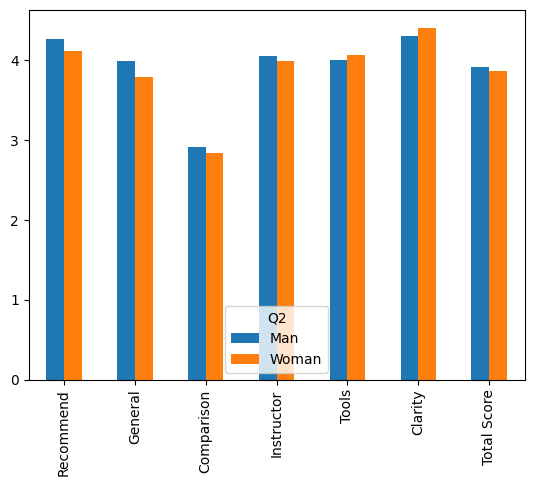

In [19]:
catgorize("Q2").iloc[:-1,1:].transpose().plot(kind="bar")

In [20]:
print(questions_dict['Q5'])
catgorize("Q5")

In which domain is the class you spent more time on (e.g., lecture hours, homework, exercises, course project, individual study time)?Time spent is an individual assessment, do not refer on the indication of your Syllabus but on the actual time YOU spent on the subject. Remember to think to this class when answering the the survey.


,count,Recommend,General,Comparison,Instructor,Tools,Clarity,Total Score
Q5,,,,,,,,
Programming Languages,70,4.319048,3.900000,3.017857,4.013393,4.151429,4.409524,3.968542
Alghoritms and Data Structures,42,4.261905,3.761905,2.880952,4.105655,4.114286,4.484127,3.934805
Software Engineering and Design,40,3.908333,3.950000,2.943750,3.956250,3.815000,4.241667,3.802500
Mathematics,37,4.729730,4.756757,3.175676,4.361486,4.183784,4.702703,4.318356
Security,23,4.318841,3.869565,2.739130,4.168478,4.104348,4.115942,3.886051
Machine Learning,17,3.921569,3.470588,2.382353,3.750000,3.705882,3.882353,3.518791
Human-Computer Interaction and Interfaces,17,4.039216,3.529412,2.867647,3.992647,4.058824,4.294118,3.796977
Computer Architecture and Compilers,15,4.133333,3.600000,2.633333,3.900000,3.733333,4.466667,3.744444
Other,15,3.933333,3.466667,2.083333,3.779167,3.720000,4.200000,3.530417


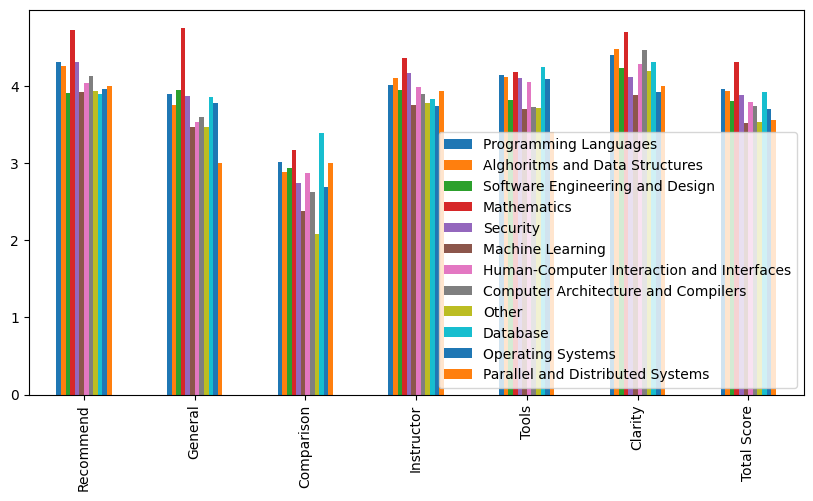

In [21]:
lst = ['Mathematics', 'Computer Architecture and Compilers']
# catgorize("Q5").iloc[:,1:].transpose()[lst].plot(kind="bar")
catgorize("Q5").iloc[:,1:].transpose().plot(kind="bar", figsize=(10,5))
plt.legend(loc='lower right')

In [22]:
print(questions_dict['Q8'])
catgorize("Q8")

For the course, we also worked in teams.


,count,Recommend,General,Comparison,Instructor,Tools,Clarity,Total Score
Q8,,,,,,,,
Agree,192,4.192708,3.875000,2.757812,4.043945,3.988542,4.321181,3.863198
Disagree,108,4.237654,3.944444,3.108796,3.986111,4.100000,4.391975,3.961497


<Axes: >

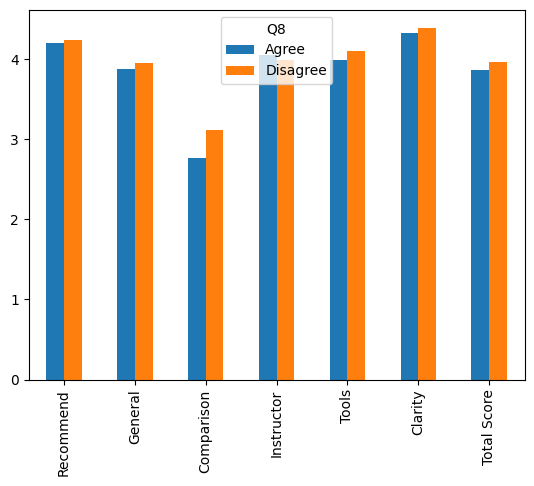

In [23]:
catgorize("Q8").iloc[:,1:].transpose().plot(kind="bar")

In [24]:
print(questions_dict['Q4'])
catgorize("Q4")

In which country are you performing your education?


,count,Recommend,General,Comparison,Instructor,Tools,Clarity,Total Score
Q4,,,,,,,,
United Kingdom,150,4.104444,3.693333,2.816667,3.864167,3.941333,4.066667,3.747769
United States of America,149,4.313199,4.120805,2.968121,4.182047,4.115436,4.630872,4.055080
Other,1,4.333333,2.000000,0.500000,4.187500,4.200000,4.000000,3.203472


<Axes: >

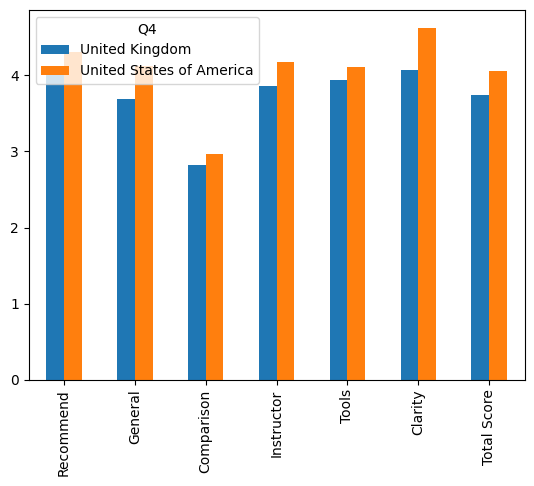

In [25]:
catgorize("Q4").iloc[:-1,1:].transpose().plot(kind="bar")

           Q4  score
2   -0.157403    1.0
3   -0.157403    4.0
4   -0.157403    5.0
5   -0.157403    4.0
6   -0.157403    2.0
..        ...    ...
297  0.200297    4.0
298  0.200297    5.0
299  0.200297    5.0
300  0.200297    6.0
301  0.200297    5.0

[300 rows x 2 columns]


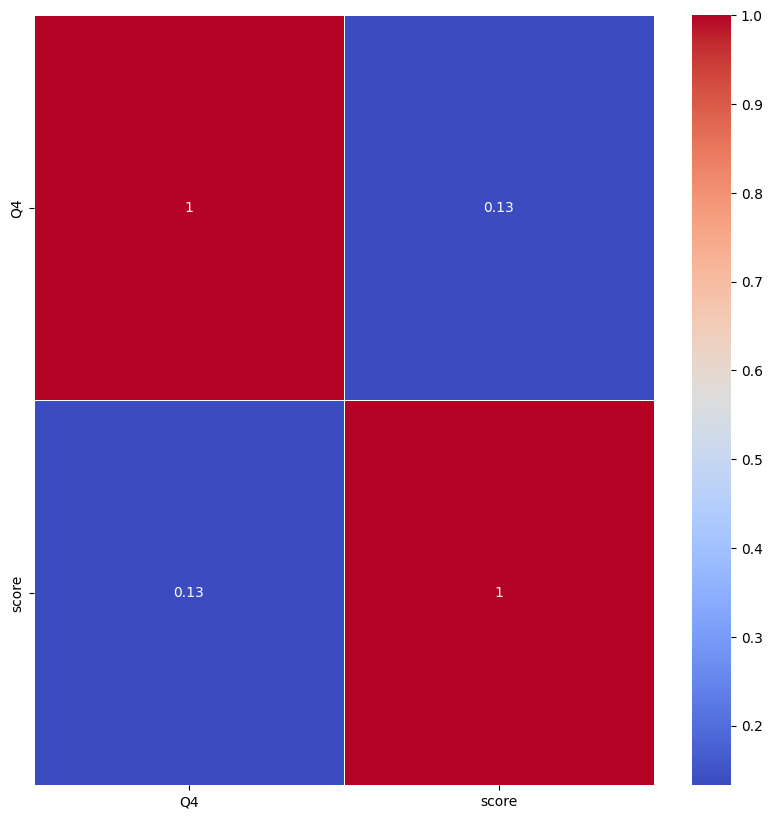

In [67]:
# catgorical encoding for fisrt 8 questions
import category_encoders as ce

xarg_question = ["Q3"]
yarg_question = ["Q18"]

encoder = ce.GLMMEncoder(binomial_target=False)
Encodedfeatures = encoder.fit_transform(df[xarg_question], df_mapped[yarg_question].mean(axis=1))
# print(Encodedfeatures)

df_comp = pd.DataFrame(Encodedfeatures)
df_comp['score'] = df_mapped[yarg_question].mean(axis=1)

print(df_comp)

# heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df_comp.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()

In [66]:
# catgorical encoding for fisrt 8 questions
import category_encoders as ce

xarg_question = ["Q5", "Q8"]
yarg_question = ["Q14", "Q15", "Q16", "Q17"]



df_comp = pd.DataFrame()
df_comp[xarg_question] = df[xarg_question]
df_comp['score'] = df_mapped[yarg_question].mean(axis=1)

df_comp = df_comp.groupby(by = xarg_question).mean()
print(df_comp)

                                                       score
Q5                                        Q8                
Alghoritms and Data Structures            Agree     3.156250
                                          Disagree  2.513889
Computer Architecture and Compilers       Agree     3.428571
                                          Disagree  1.937500
Database                                  Agree     3.113636
                                          Disagree  4.416667
Human-Computer Interaction and Interfaces Agree     2.562500
                                          Disagree  3.600000
Machine Learning                          Agree     2.089286
                                          Disagree  3.750000
Mathematics                               Agree     2.487500
                                          Disagree  3.985294
Operating Systems                         Agree     4.000000
                                          Disagree  2.041667
Other                   